(4)=
# Chapter 4: NumPy

In [117]:
%config InlineBackend.figure_format = 'svg'

NumPy is a popular library in the Python ecosystem and a critical component of the SciPy stack. So much so that NumPy is even included in Apple's default installation of Python and in other Python-powered applications such as [Blender](https://www.blender.org/). While it may be tempting to work with NumPy's objects as lists or to circumnavigate the NumPy library altogether, the time it takes to learn NumPy's powerful features is well worth it! It will often allow you to solve problems with less effort and time and with shorter and faster-executing code. This is due to:

- NumPy automatically propagating operations to all values in an array instead of requiring for loops

- A massive collection of functions for working with numerical data

- Many of NumPy's functions are Python-wrapped C code making them run faster
    
The NumPy package can be imported by `import numpy`, but the scientific Python community has developed an unofficial, but strong, convention of importing NumPy using the `np` alias. It is a matter of personal preference whether to use the alias or not, but it is strongly encouraged for consistency with the rest of the community. Instead of `numpy.function()`, the function is then called by the shorter `np.function()`. All of the NumPy code in this and subsequent chapters assumes the following import.

In [118]:
import numpy as np

(4.1)=
## 4.1 NumPy Arrays

One of the main contributions of NumPy is the *ndarray* (i.e., "n-dimensional array"), *NumPy array*, or just *array* for short. This is an object similar to a list or nested list of lists except that mathematical operations and NumPy functions automatically propagate to each element instead of requiring a `for` loop to iterate over it. Because of their power and convenience, arrays are the default object type for any operation performed with NumPy and many scientific libraries that are built on NumPy (e.g., [SciPy](https://www.scipy.org/), [pandas](5), [scikit-learn](12), etc...).

(4.1.1)=
### 4.1.1 Basic Arrays

The NumPy array looks like a Python list wrapped in `array()`. It is an iterable object, so you *could* iterate over it using a `for` loop if you really want to. However, because NumPy automatically propagates operations through the array, `for` loops are typically unnecessary. For example, let us say you want to multiply a list of numbers by 2. Doing this with a list would likely look like the following.

In [119]:
nums = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for value in nums:
    print(2 * value)

0
2
4
6
8
10
12
14
16
18


In contrast, performing this same operation using a NumPy array only requires multiplying the array by 2.

In [120]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(2 * arr)

[ 0  2  4  6  8 10 12 14 16 18]


(4.1.2)=
### 4.1.2 Type Conversion to Arrays

There are three common ways to generate a NumPy array that we will cover in the beginning of this chapter. The first is simply to convert a list or tuple to an array using the `np.array()` function.

In [121]:
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # list
arr = np.array(a)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

The fact that the object is an ndarray is denoted by the `array()`.

(4.1.3)=
### 4.1.3 Array from Sequence

We can also create an array using NumPy sequence-generating functions. There are two common functions in NumPy for this task: `np.arange()` and `np.linspace()`. The `np.arange()` function behaves similarly to the native Python `range()` function with the key difference that it outputs an array. Another minor difference is that while `range()` generates a range object, `np.arange()` generates a sequences of values immediately. The arguments for `np.arange()` are similar to that of Python's `range()` function where start is inclusive and stop is exclusive, but unlike `range()`, the step size for `np.arange()` does not need to be an integer value.

~~~python
np.arange(start, stop, step)
~~~

The `np.linspace()` function is related to `np.arange()` except that instead of defining the sequence based on step size, it generates a sequence based on how many evenly distributed points to generate in the given span of numbers. Additionally, `np.arange()` excludes the stop values while `np.linspace()` includes it. The difference between these two functions is somewhat subtle, and the use of one over the other often comes down to user preference or convenience. 

~~~python
np.linspace(start, stop, number of points)
~~~

In [122]:
arr = np.arange(0, 10, 0.5)
arr

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [123]:
arr = np.linspace(0,10, 20)
arr

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

Two other useful functions for generating arrays are `np.zeros()` and `np.ones()` which generate arrays populated with exclusively zeros and ones, respectively. The functions accept the shape argument as a tuple of the array dimensions in the form `(rows, columns)`.

In [124]:
np.zeros((2,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [125]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

You should commit to remembering `np.arange()` and `np.linspace()`, as these are used often. The `np.zeros()` and `np.ones()` functions are not as common but are useful in particular applications. They can also be used to generate arrays filled with other values. For example, to generate an array of threes, an array of zeros can be generated and then incremented by 3.

In [126]:
arr = np.zeros((2,4))
arr += 3
print(arr)

[[3. 3. 3. 3.]
 [3. 3. 3. 3.]]


(4.1.4)=
### 4.1.4 Arrays from Functions

A third approach is to generate an array from a function using `np.fromfunction()` which generates an array of values using the array indices as inputs. This function requires a function as an argument.

~~~python
np.fromfunction(function, shape)
~~~

Let us make an array of the dimensions (3,3) where each element is the product of the row and column indices.

In [127]:
def prod(x, y):
    return x * y

In [128]:
np.fromfunction(prod, (3,3))

array([[0., 0., 0.],
       [0., 1., 2.],
       [0., 2., 4.]])

(4.2)=
## 4.2 Reshaping & Merging Arrays

Modifying the dimensions of one or more arrays is a common task in NumPy. This may involve changing the number of columns and rows or merging multiple arrays into a larger array. The *size* and *shape* or an array are the number of elements and dimensions, respectively. These can be determined using the `size` and `shape` NumPy methods.

In [129]:
counting = np.array([[1, 2, 3], [4, 5, 6]])

In [130]:
counting.size

6

In [131]:
counting.shape

(2, 3)

The NumPy convension is to provide the dimensions of a two-dimensional array as **(row, columns)**.

(4.2.1)=
### 4.2.1 Reshaping Arrays

The dimensions of arrays can be modified using the `np.reshape()` method. This method maintains the number of elements and order of elements in the array but repacks them into a different number of row and columns. Because the number of elements is maintained, the new size array needs to contain the same number of elements as the original.

~~~python
np.reshape(array, dimensions)
~~~

In this function, `array` is the NumPy array being reshaped and `dimensions` is a tuple containing the desired number of rows and columns in that order. The original array must fit exactly into the new dimensions or else NumPy will refuse to change it. This method does not change the original array in place but rather returns a modified copy. This is a good time to note that because this and other NumPy functions are methods for NumPy arrays, they can also be called by listing the array up front like list and string methods presented in [chapter 1](1.3.3). For example, the `reshape()` function can be called with `array.reshape(dimensions)`.

In [132]:
array_1D = np.linspace(0, 9.5, 20)
array_1D

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

The following code reshapes the array into a 4 $\times$ 5 array.

In [133]:
array_2D = np.reshape(array_1D, (4, 5))
array_2D

array([[0. , 0.5, 1. , 1.5, 2. ],
       [2.5, 3. , 3.5, 4. , 4.5],
       [5. , 5.5, 6. , 6.5, 7. ],
       [7.5, 8. , 8.5, 9. , 9.5]])

If you need to reshape an array with only one new dimension known, place a `-1` in the other. This signals to NumPy that it should choose the second dimension to make the data fit.

(4.2.2)=
### 4.2.2 Flatten Arrays

Flattening an array takes a higher-dimensional array and squishes it into a one-dimensional array. To flatten out an array, the `np.flatten()` method is often the most convenient way.

In [134]:
array_2D.flatten()

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

The format of the output makes it look like it is still a 2D array, but notice that there is a comma instead of a square bracket at the end of the first row. The dimensions of this array are 1 $\times$ 20.

(4.2.3)=
### 4.2.3 Transpose Arrays

Transposing an array rotates the array around the diagonal (Figure 1).

![](img/transpose.png)

**Figure 1** The `np.transpose()` or `array.T` method transposes the NumPy array effectively flipping the rows and columns.

The `np.transpose()` method flips the rows and columns. NumPy also provides an alias/shortcut of `array.T` to accomplish the same outcome. The latter is far more common, so it is the method used here.

In [135]:
array_2D

array([[0. , 0.5, 1. , 1.5, 2. ],
       [2.5, 3. , 3.5, 4. , 4.5],
       [5. , 5.5, 6. , 6.5, 7. ],
       [7.5, 8. , 8.5, 9. , 9.5]])

In [136]:
array_2D.T

array([[0. , 2.5, 5. , 7.5],
       [0.5, 3. , 5.5, 8. ],
       [1. , 3.5, 6. , 8.5],
       [1.5, 4. , 6.5, 9. ],
       [2. , 4.5, 7. , 9.5]])

(4.2.4)=
### 4.2.4 Merge Arrays

Merging arrays can be done in multiple ways. NumPy provides convenient methods for merging arrays using `np.vstack`, `np.hstack`, and `np.dstack` which merge arrays along the vertically, horizontally, and depth-wise axes, respectively (Figure 2).

![](img/stack.png)

**Figure 2** NumPy arrays can be stacked vertically (top left), depth-wise (top right), or horizontally (bottom) using the `np.vstack()`, `np.dstack()`, and `np.hstack()` functions, respectively.

In [137]:
a = np.arange(0, 5)

In [138]:
b = np.arange(5, 10)

In [139]:
np.vstack((a, b))

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [140]:
np.hstack((a, b))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [141]:
np.dstack((a, b))

array([[[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]]])

(4.3)=
## 4.3 Indexing Arrays

Similar to lists, it is often useful to be able to index and slice ndarrays. Because arrays are often higher dimensional, there are some differences in indexing that provide extra convenience. 

(4.3.1)=
### 4.3.1 One-Dimensional Arrays

Indexing one-dimensional arrays is done in an identical fashion to lists. Simply include the index value(s) or range in square brackets behind the array name.

In [142]:
array_1D

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [143]:
array_1D[5]

2.5

(4.3.2)=
### 4.3.2 Two-Dimensional Arrays

Two-dimensional arrays can be also indexed in a similar fashion to nested lists, but because arrays are often multidimensional, there is also a shortcut below to make work with arrays more convenient. To access the entire second row of an array, provide the row index in square brackets behind the array name just like indexing in lists.

In [144]:
array_2D

array([[0. , 0.5, 1. , 1.5, 2. ],
       [2.5, 3. , 3.5, 4. , 4.5],
       [5. , 5.5, 6. , 6.5, 7. ],
       [7.5, 8. , 8.5, 9. , 9.5]])

In [145]:
array_2D[1]

array([2.5, 3. , 3.5, 4. , 4.5])

To access the first element in the second row, it is perfectly valid to use two adjacent square brackets just as one would use in a nested list of lists. However, to make work more convenient, these square brackets are often combined with the row and column indices separated by commas.

~~~python
array_name[rows, columns]
~~~

In [146]:
array_2D[1][0]

2.5

In [147]:
array_2D[1, 0]

2.5

Ranges of values can also be accessed in arrays by using slicing. The following array input generates a slice of the second row of the array. 

In [148]:
array_2D[1, 1:]

array([3. , 3.5, 4. , 4.5])

As seen above, if you want to access an entire row, it is not necessary to indicate the columns. It is implicitly understood that all columns are requested. However, if you want to access the first column, something needs to be placed before the column. The easiest solutions is the use a colon to explicitly indicate all rows.

In [149]:
array_2D[0] # implicitly understood all columns

array([0. , 0.5, 1. , 1.5, 2. ])

In [150]:
array_2D[0, :] # explicit indicating all columns

array([0. , 0.5, 1. , 1.5, 2. ])

In [151]:
array_2D[:, 0]     # all rows

array([0. , 2.5, 5. , 7.5])

```{tip}
As you index higher dimensional, you may see code that looks like `arr[...,0]` where `arr` is the array name. The three dots mean to include everything, so `arr[...,0]` has the same effect as `arr[:,:,0]` for a three-dimensional array, for example.
```

(4.4)=
## 4.4 Vectorization & Broadcasting

One of the major advantages of NumPy arrays over lists is that operations automatically *vectorize* across the arrays. That is, mathematical operations propagate through the array(s) instead of requiring `for` loops. This both speeds up the calculations and makes the code easier to read and write. 

(4.4.1)=
### 4.4.1 NumPy Functions

Let us take the square root of squares using NumPy's `np.sqrt()` function. The square root is taken of each elements automatically.

In [152]:
squares = np.array([1, 4, 9, 16, 25])

In [153]:
np.sqrt(squares)

array([1., 2., 3., 4., 5.])

Performing this operation requires NumPy's `sqrt()` function. If this is attempted with the math module's `sqrt()` function, an error is returned because this function cannot take the square root of a multi-element object.

In [154]:
import math
math.sqrt(squares)

TypeError: only size-1 arrays can be converted to Python scalars

(4.4.2)=
### 4.4.2 Scalars & Arrays

When performing mathematical operations between a scalar and an array, the same operation is performed across each elements of the array returning an array of the same dimension as the starting array. Below, an array is multiplied by the scaler 3 which results in every element in the array being multiplied by this value.

$$ 3 \times \left[ \begin{array}{cc} 5 & 6 \\ 7 & 8 \end{array} \right] = \left[ \begin{array}{cc} 15 & 18 \\ 21 & 24 \end{array} \right] $$

In [155]:
3 * np.array([[5, 6], [7, 8]])

array([[15, 18],
       [21, 24]])

The same outcome arises when performing a similar operation between a 1 $\times$1 array and a larger array.

$$ \left[ \begin{array}{c} 2 \end{array} \right] + \left[ \begin{array}{cc} 10 & 20 \end{array} \right] = \left[ \begin{array}{cc} 12 & 22 \end{array} \right] $$

In [156]:
np.array([2]) + np.array([10, 20])

array([12, 22])

(4.4.3)=
### 4.4.3 Arrays of the Same Dimensions

If a mathematical operation is performed between two arrays of the same dimensions, then the mathematical operation is performed between corresponding elements in the two arrays. For example, if a pair of 2 $\times$ 2 arrays are added to one another, then the corresponding elements are added to one another. This means that the top left elements are added together and so on.

$$ \left[ \begin{array}{cc} 1 & 2 \\ 3 & 4 \end{array} \right] + \left[ \begin{array}{cc} 5 & 6 \\ 7 & 8 \end{array} \right] = \left[ \begin{array}{cc} 6 & 8 \\ 10 & 12 \end{array} \right] $$

In [157]:
a = np.array([[1,2], [3,4]]) 
b = np.array([[5,6], [7,8]]) 
a + b

array([[ 6,  8],
       [10, 12]])

(4.4.4)=
### 4.4.4 Arrays of Different Dimensions

*Broadcasting* is another form of vectorization that is a series of rules for dealing with mathematical operations between two arrays of different dimensions. In broadcasting, the one of the dimensions of the two arrays must be either identical or one-dimensional, otherwise nothing happens except an error message. To deal with the different dimensions, NumPy clones the array with fewer dimensions out so that it has the same dimensions as the other array. It should be noted that NumPy does not really clone out the array in the background; it behavior acts as if it does. It is a convenient way of thinking about the behavior and results. For example, below is the addition between a 2$\times$2 and a 1$\times$2 array. 

$$  \left[ \begin{array}{cc} 1 & 2 \\ 3 & 4 \end{array} \right] +  \left[ \begin{array}{cc} 2 & 2 \end{array} \right]= ? $$

To make the two arrays the same size, the smaller array is cloned along the smaller dimension until the two arrays are the same size as shown below. We are then left with simple corresponding element by corresponding element mathematical operations described in section 4.4.3.

$$  \left[ \begin{array}{cc} 1 & 2 \\ 3 & 4 \end{array} \right] +  \left[ \begin{array}{cc} 2 & 2 \\ 2 & 2 \end{array} \right]= \left[ \begin{array}{cc} 3 & 4 \\ 5 & 6 \end{array} \right] $$

In [158]:
a = np.array([[1,2], [3,4]])
b = np.array([2,2])
a + b

array([[3, 4],
       [5, 6]])

What happens if a mathematical operation is performed between an array of higher dimensions with a scalar or a 1$\times$1 array as shown below? You already probably know the answer from [section 4.4.2](4.4.2), but here is how to rationalize the behavior. In this case, no dimensions are the same, but being that one of the arrays has dimensions of one where the two arrays differ, the arrays still broadcast. 

$$ \left[ \begin{array}{cc} 1 & 2 \\ 3 & 4 \end{array} \right] \times \left[ \begin{array}{c} 2 \end{array} \right]= ?  $$

Again, the smaller array is cloned until the two arrays are the same size.

$$  \left[ \begin{array}{cc} 1 & 2 \\ 3 & 4 \end{array} \right] +  \left[ \begin{array}{cc} 2 & 2 \\ 2 & 2 \end{array} \right]= \left[ \begin{array}{cc} 2 & 4 \\ 6 & 8 \end{array} \right] $$

In [159]:
a = np.array([[1,2], [3,4]])
b = np.array([2]) 
a * b

array([[2, 4],
       [6, 8]])

Finally, if we attempt to perform a mathematical operation between two arrays with different dimensions and none of the arrays have a dimension of one where the two arrays are different, an error is raised, and no operation is performed.

$$  \left[ \begin{array}{cc} 1 & 2 \\ 3 & 4 \end{array} \right] +  \left[ \begin{array}{cCc} 1 & 1 & 1 \\ 2 & 2 & 2 \\ 3 & 3 & 3 \end{array} \right]= ? $$

In [160]:
a = np.array([[1,2], [3,4]])
b = np.array([[1,1,1], [2,2,2], [3,3,3]]) 
a + b

ValueError: operands could not be broadcast together with shapes (2,2) (3,3) 

(4.4.5)=
### 4.4.5 Vectorizing Python Functions

Standard Python functions are often designed to perform a calculation a single time and output Python objects and not NumPy arrays. As an example, the following function calculates the rate of a first-order reaction given the rate constant (`k`) and concentration of reactant (`conc`).

In [161]:
def rate(k, conc):
    return k * conc

In [162]:
rate(1.2, 0.80)

0.96

What happens if we attempt the above calculation using a list of concentration values?

In [163]:
concs = [0.1, 0.5, 1.0, 1.5, 2.0]

In [164]:
rate(1.2, concs)

TypeError: can't multiply sequence by non-int of type 'float'

We get an error because Python cannot multiply a list by a value the way NumPy can. However, the above function can be converted to a NumPy function using `np.vectorize()` which will allows the function to perform the calculation on a series of values and returns a NumPy array.

In [165]:
vrate = np.vectorize(rate)

In [166]:
vrate(1.2, concs)

array([0.12, 0.6 , 1.2 , 1.8 , 2.4 ])

(4.5)=
## 4.5 Array Methods

Technically, NumPy array methods have already been employed in this chapter. The functions above are NumPy methods specifically for working with NumPy arrays. If an array is fed to many non-NumPy functions, an error will result because they cannot handle multi-element objects or arrays specifically. Interestingly, if a float or integer is fed into a NumPy method, it will still work. As an example, the integer 4 can be fed into the `np.sqrt()` function as well as an array of values.

In [167]:
np.sqrt(4)

2.0

In [168]:
np.sqrt(np.array([1, 4, 9]))

array([1., 2., 3.])

NumPy contains an extensive listing of methods for working with arrays… so much so that it would be impractical to list them all here. However, below are tables of some common and useful methods. It is worth browsing and being aware of them; most are worth committing to memory. If you ever find yourself needing to manipulate an array in some complex fashion, it is worth doing a quick internet search and including “NumPy” in your search. You will likely either find additional NumPy methods that will help or advice on how others solved a similar problem.

**Table 1** Common Methods for Generating Arrays

| Method | Description |
|:------ | :---------
|`np.array()` |Generates an array from another object |
|`np.arange()` | Creates an array from \[start, stop) with a given step size |
|`np.linspace()` | Creates an array from \[start, stop\] with given number of steps |
|`np.empty() ` | Creates an “empty” array (actually filled with garbage) |
|`np.zeros()`| Generates an array of a given dimensions filled with zeros |
|`np.ones()`| Generates an array of a given dimensions filled with ones |
|`np.fromfunction()` | Generates an array using a Python function |
|`np.genfromtxt()` | Loads text file data into an array |
|`np.loadtxt()` | Load text file data into an array (cannot handle missing data) |


**Table 2** Array Attribute Methods

| Method | Description |
|:------:| :--------   |
|`np.shape(array)` | Returns the dimensions of an array |
|`np.ndim(array)` | Returns the number of dimensions (e.g., a 2D array is 2) |
|`np.size(array)` | Returns the number of elements in an array |


**Table 3** Array Modification Methods

| Method | Description |
|:------:| :--------   |
|`np.flatten()` | Flattens an array in place |
|`np.ravel()`    | Returns a flattened view of the array without changing the array |
|`np.reshape()`  | Reshapes an array in place |
|`np.resize()`   | Returns a resized view of an array without modifying the original |
|`np.transpose()` | Returns a view of transposed array |
|`np.vstack()`   | Vertically stacks an arrays into a new array |
|`np.hstack()`   | Horizontally stacks an arrays into a new array |
|`np.dstack()`   | Depth-wise stacks an arrays into a new array |
|`np.vsplit()`   | Splits an array vertically |
|`np.hsplit()`   | Splits an array horizontally |
|`np.dsplit()`   | Splits an array depth-wise |
|`np.meshgrid()` | Creates a meshgrid (see chapter 3 for an example) |
|`np.sort(`)     | Sorts elements in array; defaults along last axis |
|`np.argsort()`  | Returns index values of sorted array |
|`np.fill(x)`    | Sets all values in an array to `x` |

**Table 4** Array Measurement Methods

| Method | Description |
|:-----: | :---------- | 
|`np.min()` |Returns the minimum value in the array |
|`np.max()` |Returns the maximum value in the array|
|`np.argmin()` |Returns argument (i.e., index) of min|
|`np.argmax()` |Returns argument  (i.e., index) of max|
|`np.argrelmax()` |Returns argument  (i.e., index) of the local max|
|`np.fmin()` |Returns the min between two arrays of the same size|
|`np.fmax()` |Returns the max between two arrays of the same size|
|`np.percentile()` |Returns the specified percentile|
|`np.mean()` |Returns the mean|
|`np.median()` |Returns the median|
|`np.std()` |Returns the standard deviation; be sure to include `ddof=1`|
|`np.histogram()` |Returns counts and bins for a histogram|
|`np.cumprod()` |Returns the cumulative product|
|`np.cumsum()` |Returns the cumulative sum |
|`np.sum()` |Returns the sum of all elements|
|`np.prod()` |Returns the product of all elements|
|`np.ptp()` |Returns the peak-to-peak separation of max and min values|
|`np.floor()` |Returns the floor (i.e., rounds down) of all elements in an array|
|`np.roll()`|Rolls the array along the given axis; elements that fall off one end of the array appear at the other|

```{note}
The standard deviation equation includes a degrees of freedom. The default value for NumPy is zero, but the default value for Excel, and some other, software is one. If you want your standard devationations to match Excel, include the `ddof=1` argument to the `np.std()` standard deviation function.
```

(4.6)=
## 4.6 Missing Data

Real data sets frequently contain gaps or missing values, so it is important to be able to deal with missing data. When importing data into NumPy, there are two commonly employed functions, `np.genfromtxt()` and `np.loadtxt()`. Though these are largly analogous functions in terms of capabilities, there is a key difference in that `np.genfromtxt()` can handle missing data while `np.loadtxt()` cannot. This means if your data set may contain gaps, you should use `np.genfromtxt()`.

In the event the data file contains a gap, the `np.genfromtxt()` function will place a `nan` in that loacation by default. The `nan` stands for "not a number" and is simply a placeholder. For example, the file *dHf_ROH.csv* contains the number of carbons in linear alcohols and the gas-phase heat of formation in kJ/mol of each alcohol. The value for 1-undecanol (eleven carbons) is missing, so `np.genfromtxt()` places a `nan` in its place.

In [169]:
np.genfromtxt('data/dHf_ROH.csv', delimiter=',')

array([[   1., -205.],
       [   2., -234.],
       [   3., -256.],
       [   4., -277.],
       [   5., -298.],
       [   6., -316.],
       [   7., -340.],
       [   8., -356.],
       [   9., -377.],
       [  10., -395.],
       [  11.,   nan],
       [  12., -437.]])

Some data files use placeholder values instead of no value at all. These placeholders are often `-1`, `0`, `999`, or some physically meaningless or improbable value. If you have an alternative values you want in the missing data location, you can specify this using the `filling_values=` argument. As an example below, the missing value is replaced with a `999`.

In [170]:
np.genfromtxt('data/dHf_ROH.csv', delimiter=',', filling_values=999)

array([[   1., -205.],
       [   2., -234.],
       [   3., -256.],
       [   4., -277.],
       [   5., -298.],
       [   6., -316.],
       [   7., -340.],
       [   8., -356.],
       [   9., -377.],
       [  10., -395.],
       [  11.,  999.],
       [  12., -437.]])

In the event you have data with missing values, the `nan` placeholders can pose an issue when running statistics on the data. Below, we use the `np.mean()` method to try to calculate the mean enthalpy of formation but get a `nan` instead because the `np.mean()` function cannot handle the placeholder. 

In [171]:
dHf = np.genfromtxt('data/dHf_ROH.csv', delimiter=',')

In [172]:
np.mean(dHf[:,1])

nan

Alternatively, NumPy has a number of versions of functions, listed below, that are specifically designed to handle data with missing values.

| Function  | Description |
|-----------|-------------|
|`np.nanstd()`| Standard deveation |
|`np.nanmean()`| Mean |
|`np.nanvar()`| Variance |
|`np.nanmedian()`| Median |
|`np.nanpercentile()`| Qth percentile |
|`np.nanquantile()`| Qth quantile |

In [173]:
np.nanmean(dHf[:,1])

-317.3636363636364

In [174]:
np.nanquantile(dHf[:,1], 0.6)

-298.0

(4.7)=
## 4.7 Random Number Generation

Stochastic simulations, addressed in [chapter 9](9), are a common tool in the sciences and rely on a series of random numbers; it is worth addressing their generation using NumPy. Depending upon the requirements of the simulation, random numbers may be a series of floats or integers, and they may be generated from various ranges of values. The numbers may also be generated as a uniform distribution where all values are equally likely or biased a distribution where some values are more probable than others. Below are random number functions from the NumPy `random` module useful in generating random number distributions to suit the needs of your simulations.

```{note}
Software generated random numbers are really *pseudorandom* numbers. However, they are close enough to
random for most chemical simulations and will be referred to as “random numbers” herein.
```

(4.7.1)=
### 4.7.1 Uniform Distribution

The simplest distribution is the *uniform distribution* of random numbers where every number in the range has an equal probability of occurring. The distribution may not always appear as even with small sample sizes due to the random nature of the number generation, but as a larger population of samples is generated, the relative distribution will appear more even. The histograms below (Figure 3) are of a hundred (left) and a hundred thousand (right) randomly generated floats from the \[0,1) range in an even distribution. While the plot on the right appears more even, this is mostly an effect of the different scales.

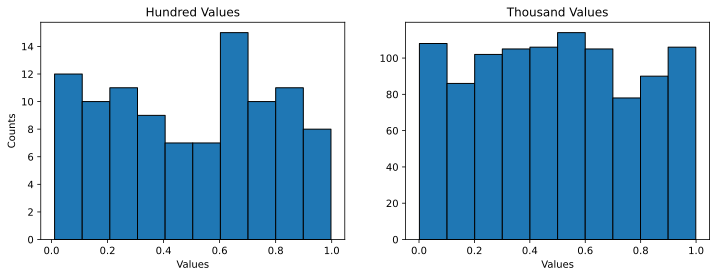

In [175]:
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(18)
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax1.hist(np.random.rand(100), edgecolor='k')
ax1.set_ylabel('Counts')
ax1.set_xlabel('Values')
ax1.set_title('Hundred Values')
ax2 = fig.add_subplot(1,2,2)
ax2.hist(np.random.rand(1000), edgecolor='k')
ax2.set_xlabel('Values')
ax2.set_title('Thousand Values')
plt.show()

**Figure 3** Histograms of a hundred (left) and a hundred thousand (right) randomly generated floats from the [0,1) range in an even distribution using the `np.random.rand()` function.

NumPy has multiple functions available for generating evenly-distributed random numbers including the following two functions where `n` is the number of random values to be generated. The `np.random.rand()` function generates random floats from the range \[0,1) and can generate one or more values. The `np.random.randint()` function generates random integers in the range \[low, high) and can generate multiple values using the size argument.
~~~python
np.random.rand(n)

np.random.randint(low, high=None, size=n)
~~~

(4.7.2)=
### 4.7.2 Binomial Distribution

A binomial distribution results when values are generated from two possible outcomes. This is useful for applications such as deciding if a simulated molecule reacts or whether a polymer chain terminates or propagates. The two outcomes are represented by a `0` or `1` with the probability, `p`, of a `1` being generated. Binomial distributions are generated by the NumPy random module using the `np.random.binomial()` function which has a default probability of `0.5`.

~~~python
np.random.binomial(t, p=0.5, size=n)
~~~

The `t` argument is the number of trials while the size argument is the number of generated binomial values. For example, if `t = 2`, two binomial values are generated and the sum is returned, which may be `0`, `1`, or `2`. Basic probability predicts that these sums will occur in a 1:2:1 ratio, respectively. If `t` is increased to `10`, a shape more closely representing a bell curve is obtained. A *Bernoulli distribution* is the specific instance of a binomial distribution where t = 1. The histograms below (Figure 4) are of a hundred randomly generated numbers in a binomial distribution with `p = 0.5` and where `t = 1` (top), `t = 2` (bottom left), and `t = 10` (bottom right).

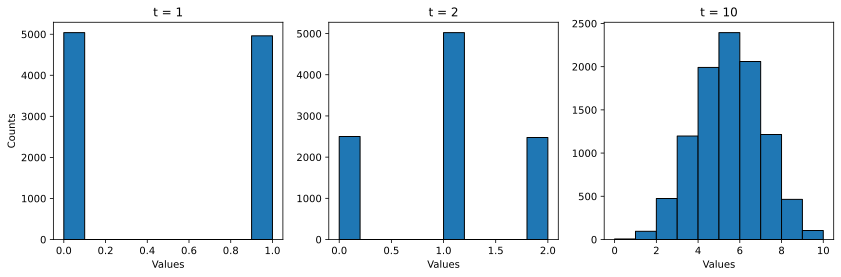

In [176]:
np.random.seed(18)

fig = plt.figure(figsize=(14,4))

ax1 = fig.add_subplot(1,3,1)
ax1.hist(np.random.binomial(1, p=0.5, size=10000), edgecolor='k')
ax1.set_ylabel('Counts')
ax1.set_xlabel('Values')
ax1.set_title('t = 1')
ax2 = fig.add_subplot(1,3,2)
ax2.hist(np.random.binomial(2, p=0.5, size=10000), edgecolor='k')
ax2.set_xlabel('Values')
ax2.set_title('t = 2')
ax3 = fig.add_subplot(1,3,3)
ax3.hist(np.random.binomial(10, p=0.5, size=10000), edgecolor='k')
ax3.set_xlabel('Values')
ax3.set_title('t = 10')
plt.show()

**Figure 4** Histograms of a hundred randomly generated numbers in a binomial distribution with `p = 0.5` and `t = 1` (top), `t = 2` (bottom left), and `t = 10` (bottom right).

(4.7.3)=
### 4.7.3 Poisson Distribution

A *Poisson distribution* is a probability distribution of how likely it is for independent events to occur in a given interval (time or space) with a known average frequency ($\lambda$). Each sample in a poisson distribution is a count of how many events have occurred in the time interval, so they are always integers. NumPy can generate integers in a Poisson distribution using the `np.random.poisson()` function, which accepts two arguments. 

~~~python
np.random.poisson(lam=1.0, size=n)
~~~

The first argument, $\lambda$ (`lam`), is the statistical mean for the values generated, and the second argument, `size`, is the requested number of values. For example, a Geiger counter can be simulated detecting background radiation in a location that is known to have an average of 3.6 radiation counts per second with the following function call.

In [177]:
np.random.poisson(lam=3.6, size=30)

array([5, 3, 5, 4, 2, 2, 5, 2, 3, 3, 6, 2, 5, 2, 0, 1, 2, 0, 4, 4, 9, 5,
       1, 7, 2, 3, 2, 3, 3, 4])

The returned array of values are the total radiation detections for each second for thirty seconds, and the mean value is 3.8 counts. While not precisely the target of 3.6 counts, it is close and larger sample sizes are statistically more likely to generate results closer to the target value. A histogram of these values is shown in below (Figure 5, left). When this simulation was repeated with thirty thousand samples (Figure 5, right), a mean of 3.61 counts is obtained. In addition, the larger number of values results in a classic Poisson distribution curve which appears something like a bell curve with more tapering on the high end.

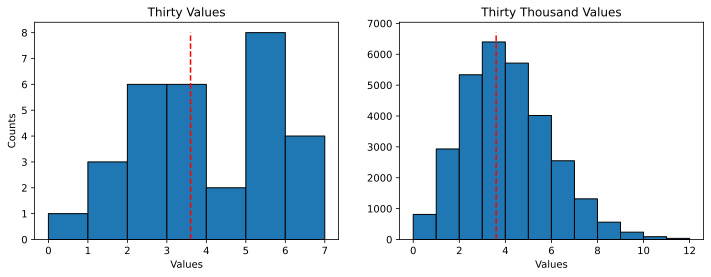

In [178]:
np.random.seed(18)
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax1.hist(np.random.poisson(lam=3.6, size=30), bins=range(0,8), edgecolor='k')
ax1.vlines(3.6, 0, 8, 'r', linestyle='dashed')
ax1.set_ylabel('Counts')
ax1.set_xlabel('Values')
ax1.set_title('Thirty Values')
ax2 = fig.add_subplot(1,2,2)
ax2.hist(np.random.poisson(lam=3.6, size=30000), bins=range(0,13), edgecolor='k')
ax2.vlines(3.6, 0, 6700, 'r', linestyle='dashed')
ax2.set_xlabel('Values')
ax2.set_title('Thirty Thousand Values')
plt.show()

**Figure 5** Histograms of thirty (left) and thirty thousand (right) randomly generated integers in a Poisson distribution with a target mean ($\lambda$) of 3.6 (dashed red line).

Alternative distributions of random number can be generated by manipulating the output of the above functions. For example, random numbers in a \[-1, 1) distribution, which is useful in a 2D diffusion simulation, can be generated by subtracting 0.5 from values in the range \[0, 1) and multiplying by two.

~~~python
rand_float = 2 * (np.random.rand() - 0.5)
~~~

(4.7.4)=
### 4.7.4 Other Functions

The random module in NumPy also includes a large variety of other random number and sequence generators. This includes `np.random.randn()` which generates values centered around zero in a normal distribution. The `np.random.choice()` function selects a random value from a provided array of values, while the `np.random.shuffle()` function randomizes the order of values for a given array. Other random distribution functions can be found on the SciPy website (see [Further Reading](fr04)). A summary of common np.random functions are in Table 5.

**Table 5** Summary of Common NumPy np.random Functions

| Function | Description | 
|:-------: |:----------- |
|`np.rand()`  | Generates random floats in the range \[0,1) in an even distribution |
|`np.randint()` | Generates random integers from a given range in an even distributionb |
|`np.randn()` | Generates random floats in a normal distribution centered around zero |
|`np.binomial()` | Generates random integers in a binomial distribution; takes a probability ,`p`, and `size` artuments |
|`np.poisson()` | Generates random floats in a Poisson distribution; takes a target mean argument (`p`)  |
|`np.choice()` | Selects random values taken from a 1-D array or range |
|`np.shuffle()` | Randomizes the order of an array |


In [179]:
np.random.rand(1)

array([0.02995709])

In [180]:
np.random.randint(0, high=100)

65

In [181]:
np.random.randn(3)

array([-1.14124989,  1.15506919, -0.53863963])

In [182]:
np.random.binomial(2, p=0.5, size=3)

array([2, 1, 1])

In [183]:
np.random.poisson(lam=2.0, size=5)

array([5, 2, 1, 2, 4])

In [184]:
np.random.choice(20, size=3)

array([ 6,  0, 17])

In [185]:
arr = np.array([0, 1, 2, 3, 4])
np.random.shuffle(arr)
arr

array([3, 4, 1, 0, 2])

(fr04)=
## Further Reading

The NumPy documentation is well written and a good resource. Because NumPy is the foundation of the SciPy ecosystem, if you find a Python book on scientific computing, odds are that it will discuss or use NumPy at some level.

1. NumPy Website. [http://www.numpy.org/](http://www.numpy.org/) (free resource)

2. NumPy User Guide. [https://numpy.org/doc/stable/user/index.html#user](https://numpy.org/doc/stable/user/index.html#user) (free resource)

## Exercises

Complete the following exercises in a Jupyter notebook using NumPy and NumPy arrays. Avoid using `for` loops whenever possible. Any data file(s) refered to in the problems can be found in the **data** folder in the same directory as this chapter's Jupyter notebook.

1. Generate an array of atomic numbers for the first 26 elements.

2. The following equation defines the relationship between energy (J) of a photo and its wavelength (m) where h is Plank's constant (6.626 $\times \, 10^{-34} J\cdot s$) and c is the speed of light in a vacuum (2.998 $\times \, 10^8 m/s$).

    $$ E = \frac{hc}{\lambda} $$
    
   a. Generate an array containing the wavelengths of visible light (4.00 $\times$ 10$^{-7}$ m $\rightarrow$ 8.00 $\times$ 10$^{-7}$ m) in 5 $\times$ 10$^{-8}$ m increments.
    
    b. Generate a second array containing the energy of each wavelength of light from part a.

3. Generate an array containing 101.325 a hundred times.

4. The following array contains temperatures in Fahrenheit. Convert these values to $^\circ$C without using a for loop.
    ~~~python
    F = array([0, 32, 100, 212, 451])
    ~~~
    
5. Generate two arrays containing the following sine functionsfrom x = 0 $\rightarrow 10 \pi$ 

    $$ y = sin(x) $$
    $$ y = sin(1.1x + 0.5) $$

    a. Plot these two sine waves on the same plot.

    b. Add the two sine functions together and plot the result.

    c. Explain why the signal in part b is smaller in one area and larger in another. Hint: look at your plot for part a to see how the two origonal sine waves related to each other.

6. The numerical relationship between $\Delta G^o$ and K (equilibrium constant) is shown below. Plot $\Delta G^o$ versus K at standard temperature and pressure for K values of 0.001 $\rightarrow$ 1000. Use NumPy arrays and do not use any for loops.

    $$ \Delta G = -RTln(k) $$

7. The numerical relationship between k (rate constant) and E$_a$ is shown below. Plot k versus Ea at standard temperature and pressure for activation energies of 1 $\rightarrow$ 20 kJ/mol. Use NumPy arrays, do not use any for loops, and use A = 1. Watch your energy units carefully. 

    $$ k = Ae^{-E_a / RT} $$

8. Generate an array containing integers 0 $\rightarrow$ 14 (inclusive).

    a. Reshape the array to be a 3 $\times$ 5 array.

    b. Transpose the array, so now it should be a 5 $\times$ 3 array.

    c. Make the array one-dimensional again *without* using the `reshape()` method.

9. Generating an Combining arrays – Bohr hydrogen atom.

    a. Create an array containing the principle quantum numbers (n) for the first eight orbits of a hydrogen atom             (e.i., 1 $\rightarrow$ 8).

    b. Generate a second array containing the energy (J) of each orbit in part A for a Bohr model of a hydrogen atom           using the equation below.

    $$ E = -2.18 \times 10^{-18}J \frac{1}{n^2} $$

    c. Combine the two arrays from parts A and B into a new 8 $\times$ 2 array with the first column containing the principle quantum numbers and the second containing the energies.
    
10. Generate a one-dimensional array with the following code and index the 5th element of the array.

    ~~~python
    arr = np.random.randint(0, high=10, size=10)
    ~~~
    
11. Generate a two-dimensional array with the following code.
    ~~~python
    arr2 = np.random.randint(0, high=10, size=15).reshape(5, 3)
    ~~~
    
    a. Index the second element of the third column.
    
    b. Slice the array to get the entire third row.
    
    c. Slice the array to access the entire first column.
    
    d. Slice the array to get the last two elements of the first row.
    
12. Predict the outcome of the following operation between two NumPy arrays. Test your your prediction.

    $$ \left[ \begin{array}{cc} 1 & 1 \\ 2 & 2 \end{array} \right] + \left[1 \right] = \,\, ?$$

13. Predict the outcome of the following operation between two NumPy arrays. Test your your prediction.

    $$ \left[ \begin{array}{ccc} 1 & 8 & 9 \\ 8 & 1 & 9 \\ 1 & 8 & 1 \end{array} \right] + \left[  \begin{array}{cc} 1     & 1 \\ 1 & 1 \end{array} \right] = \,\, ? $$

14. Predict the outcome of the following operation between two NumPy arrays. Test your your prediction.

    $$ \left[ \begin{array}{cc} 1 & 8 \\ 3 & 2 \end{array} \right] + 
    \left[ \begin{array}{cc} 1 & 1 \\ 1 & 1 \end{array} \right] = \,\, ?$$

15. For the following randomly-generated array:
    ~~~python
    arr = np.random.rand(20)
    ~~~
    
    a. Find the *index* of the largest values in the following array.

    b. Calculate the mean value of the array.
    
    c. Calculate the cumulative sum of the array.

    d. Sort the array.

16. Generate a random array of values from -1 $\rightarrow$ 1 (exclusive) and calculate its median value. Hint: start with an array of values 0 $\rightarrow$ 1 (exclusive) and manipulate it.

17. Generate a random array of integers from 0 $\rightarrow$ 35 (inclusive) and then sort it.

18. Hydrogen nuclei can have a spin of +1/2 and -1/2 and occur in approximately a 1:1 ratio. Simulate the number of +1/2 hydrogen nuclei in a molecule of six hydrogen atoms and plot the distribution. Hint: being that there are two possible outcomes, this can be simulated using a *binomial distribution*. See [section 4.7.2](4.7.2).